# libraries 
- `requests` : it's used to fetch the HTML content of web pages from the given URLs.
- `bs4 - BeautifulSoup` :  parsing HTML and XML documents, it's used to parse the HTML content fetched from the URLs.
- `pandas`: it's used to create and manipulate data frames. Data extracted using BeautifulSoup is converted into a DataFrame using pandas for further processing.
- `openpyxl`: we use This library to create and manipulate Excel files (xlsx) because some computer the extract file should be xlsx format  

In [1]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
from openpyxl import Workbook

# main Function
- Fetching and Parsing HTML:
    - The function `get_dic_machine(url)` starts by making an HTTP request to the provided URL using `requests.get(url)`.
    - Then, it uses `BeautifulSoup` to parse the HTML content of the webpage obtained from the request.
- Initializing Dictionary:
    - `machineDictionary` is initialized using `dict.fromkeys()` with keys representing different attributes of a watch.
- Extracting Watch Information:
    - Information about the watch is extracted from the parsed HTML. This includes details like `brand, model, marketing name, image URLs`, etc.
    - Various methods like `find()`, `find_all()` are used to locate specific elements within the HTML document.
- iterating over `collection` and creating temp list extract and appending text content into `collection_list` 
    - The outer loop iterates over each item i in the collection.
    - listtemp is initialized as an empty list. It's meant to store the text content of each item in collection.
    - listnull is initialized as a list with three empty strings. It's used to store the processed data for each item in collection.
    - Inside the loop, the text content of each item i is extracted using .text and appended to listtemp.
    - listtemp is filtered to remove any empty strings.
    - A series of checks are performed on each string in listtemp to determine its format and content.
    - Depending on the format and content, the strings are cleaned and processed accordingly.
    - After processing, the cleaned data for each item is appended to collection_list.

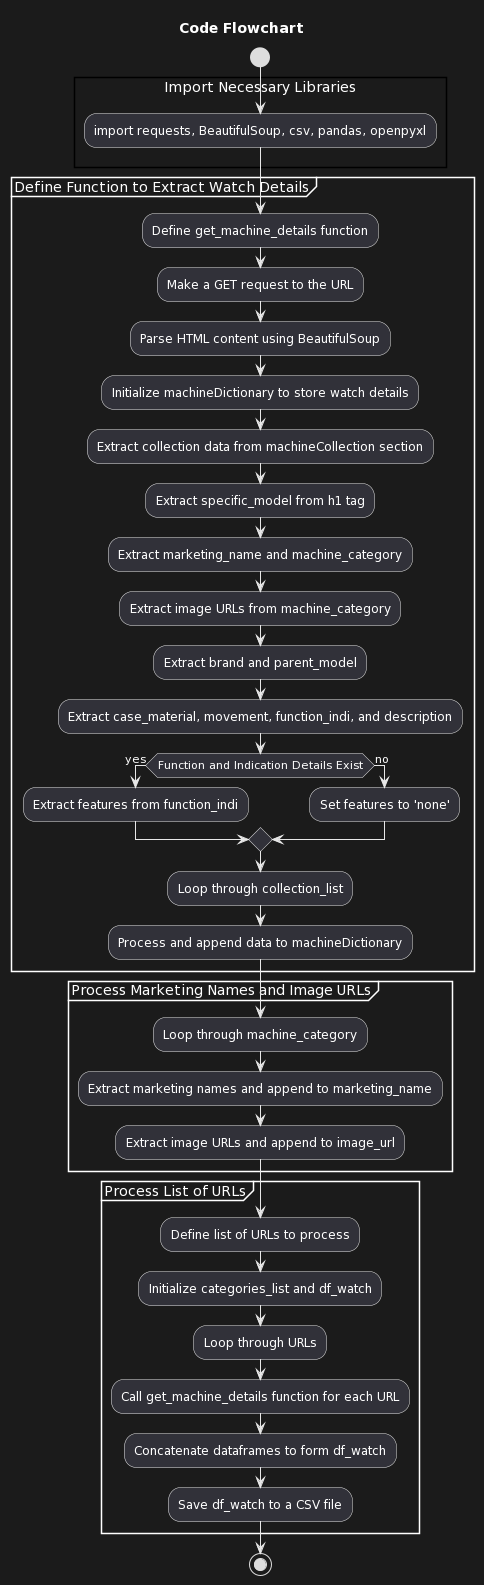

In [2]:
def get_dic_machine(url):
    html = requests.get(url)
    soup = BeautifulSoup(html.text, "html.parser")
    machineDictionary = dict.fromkeys(['field name','reference_number','watch_URL','type','brand','year_introduced',
                                       'parent_model','specific_model','nickname','marketing_name','style','currency',
                                       'price', 'image_URL','made_in','case_shape','case_material','case_finish','caseback',
                                       'diameter','between_lugs','lug_to_lug','case_thickness','bezel_material','bezel_color',
                                       'crystal','water_resistance','weight','dial_color','numerals','bracelet_material',
                                       'bracelet_color','clasp_type','movement','caliber','power_reserve','frequency',
                                       'jewels','features', 'description','short_description'])
    machineCollection = soup.find('section',id = 'collection')
    collection =  machineCollection.find_all('p',class_='xs-small')
    collection_list = []
    for i in collection:
        listtemp =[]
        listnull =['','','']
        for index,c in enumerate(i):
            listtemp.append(c.text)
            listtemp=list(filter(lambda a: a != '', listtemp))
        for index,c in enumerate(listtemp):
            check =True
            for i in c:
                if i.isnumeric():
                    if check == True:
                        check =True
                elif i == ' ':
                    if check == True:
                        check =True 
                else:
                    check =False    
            if check ==True:
                c=c.replace(" ", "")
            if (c.count('.') == 2)|(c.count('.') == 3)|((c.count('.') == 1)&(c.count('/') == 1))|((c.count('-') == 3)):
                if listnull[0] == '':
                    listnull[0]=c
                elif 'Limited edition' in c:        
                    x = c.split("Limited edition")
                    x[1] = "Limited edition" + x[1]  
                    listnull[1]=x[0]      
                    listnull[2]=x[1]     
            elif ((c.count('.') == 2)|(c.count('.') == 3)|((c.count('.') == 1)&(c.count('/') == 1))|((c.count('-') == 3))|c.isnumeric()|c.startswith("Limited")|c.endswith('Uniques')|c.endswith('unique')|c.startswith("Unique piece"))==False:
                num = c.replace('.','')
                if (c.count('.')==1)&(num.isnumeric()):
                    listnull[0]=c
                else:   
                    if 'Limited edition' in c:        
                        x = c.split("Limited edition")
                        x[1] = "Limited edition" + x[1]  
                        listnull[1]=x[0]      
                        listnull[2]=x[1] 
                    else:           
                        if listnull[1]=='':
                            listnull[1]=c
                        else: 
                            listnull[1]=listnull[1]+" "+c                     
            elif c.isnumeric()|c.startswith("Limited")|c.endswith('Uniques')|c.endswith('unique')|c.startswith("Unique piece"):
                    if c.startswith("Limited"):
                       listnull[2]=c
                    elif c.isnumeric():
                       listnull[2]=c
                    elif c.endswith('Uniques')|c.endswith('unique')|c.startswith("Unique piece"):    
                       listnull[2]=listnull[2]+' '+c                            
        collection_list.append(listnull)  
    specific_model = soup.find('h1')
    specific_model = specific_model.text.strip()
    marketing_name =[]
    machine_category = machineCollection.find_all('a',class_ ="lgitem")
    if machine_category == []:
        category = machineCollection.find_all('h3')
        for i in category:
            if i:
                    machine_edition = i.text.strip()
                    substr_to_remove = specific_model
                    machine_edition = machine_edition.replace(substr_to_remove, "")
                    marketing_name.append(machine_edition)               
    else:
        for i in machine_category:
            machine_cat = i.find('h3')
            if machine_cat:
                    machine_edition = machine_cat.text.strip()
                    substr_to_remove = specific_model
                    machine_edition = machine_edition.replace(substr_to_remove, "")
                    marketing_name.append(machine_edition)
    image_url = []
    if machine_category == []:
        machine_category = machineCollection.find_all('img')
        for img in machine_category:
                src = img.get("data-src")
                if src:
                    src = requests.compat.urljoin(url, src)
                    image_url.append(src)
    else:    
        for img in machine_category:
                    src = img.get("href")
                    if src:
                        src = requests.compat.urljoin(url, src)
                        image_url.append(src)  
    brand = soup.find('a',class_='main')
    brand =brand.text.strip()
    brand = brand.upper()   
    parent_model = url.split('/')[-2] 
    parent_model = parent_model.replace('-', " ") 
    parent_model = parent_model.capitalize()   
    machine = soup.find('section',id='machine')
    machine = machine.find_all('h3')
    checkcont=False
    checkmovement=False
    Checkfeature=False
    for sec in machine:
        word = sec.text.strip()
        word=word.lower() 
        if ('case' in word):
            case_material=sec.find_all_next()
            cont = ''
            for i in case_material:
                if i.name == 'ul':
                    continue
                elif i.name != 'h3':
                    cont =cont+'\n'+i.text  
                    checkcont =True  
                else:
                    break   
        else:
            if checkcont!=True:
                cont=''              
        if ('engine' in word):
            enginsec=sec.find_all_next()
            movement=''
            for i in enginsec:
                if i.name == 'ul':
                    continue
                elif i.name != 'h3':
                    movement =movement+'\n'+i.text
                    checkmovement=True
                else:
                    break  
        else:
            if checkmovement!=True:
                movement=''          
        if ('function' in word):
            funsec=sec.find_all_next()
            feature=''
            for i in funsec:
                if i.name == 'ul':
                    continue
                elif (i.name ==  'li'):
                    feature =feature+'\n'+i.text
                    Checkfeature=True
                else:
                    break 
        else:
            if Checkfeature!=True:
                feature=''         
    feature = feature.replace('\n', " ")             
    description = soup.find('section',id='overview')
    descr =''
    description1 = description.find_all('p')
    for des in description1:
            descr = descr+des.text.strip()  
    descr = descr.replace('\n', " ")                       
    machineDictionary["reference_number"]=[]
    machineDictionary["nickname"]=[]
    machineDictionary["short_description"]=[]
    machineDictionary["specific_model"]=[]
    machineDictionary["marketing_name"]=[]
    machineDictionary["image_URL"]=[]
    machineDictionary["field name"]=[]
    machineDictionary["specific_model"]=[]
    machineDictionary["watch_URL"]=[]
    machineDictionary["brand"]=[]
    machineDictionary["parent_model"]=[]
    machineDictionary["case_material"]=[]
    machineDictionary["diameter"]=[]
    machineDictionary["between_lugs"]=[]
    machineDictionary["lug_to_lug"]=[]
    machineDictionary["case_thickness"]=[]
    machineDictionary["movement"]=[]
    machineDictionary["caliber"]=[]
    machineDictionary["power_reserve"]=[]
    machineDictionary["frequency"]=[]
    machineDictionary["jewels"]=[]
    machineDictionary["features"]=[]
    machineDictionary["description"]=[]
    for i in collection_list:
        machineDictionary["reference_number"].append(i[0])
        machineDictionary["nickname"].append(i[1])
        machineDictionary["short_description"].append(i[2])
    machineDictionary["marketing_name"]= marketing_name    
    machineDictionary["image_URL"]=image_url
    for i in machineDictionary["nickname"]:
        machineDictionary["field name"].append('value')
        machineDictionary["specific_model"].append(specific_model)
        machineDictionary["watch_URL"].append(url)
        machineDictionary["brand"].append(brand)
        machineDictionary["parent_model"].append(parent_model)
        machineDictionary["case_material"].append(cont)
        machineDictionary["diameter"].append(cont)
        machineDictionary["between_lugs"].append(cont)
        machineDictionary["lug_to_lug"].append(cont)
        machineDictionary["case_thickness"].append(cont)
        machineDictionary["movement"].append(movement)
        machineDictionary["caliber"].append(movement)
        machineDictionary["power_reserve"].append(movement)
        machineDictionary["frequency"].append(movement)
        machineDictionary["jewels"].append(movement)
        machineDictionary["features"].append(feature)
        machineDictionary["description"].append(descr)
    return machineDictionary        

#  list of URLs

In [3]:
urls=[
'https://www.mbandf.com/en/machines/co-creations/musicmachine1-reloaded',
'https://www.mbandf.com/en/machines/co-creations/orb',
'https://www.mbandf.com/en/machines/co-creations/tripod',
'https://www.mbandf.com/en/machines/co-creations/destination-moon',
'https://www.mbandf.com/en/machines/co-creations/starfleet-explorer',
'https://www.mbandf.com/en/machines/co-creations/project-lpx',
'https://www.mbandf.com/en/machines/co-creations/t-rex',
'https://www.mbandf.com/en/machines/co-creations/medusa',
'https://www.mbandf.com/en/machines/co-creations/grant',
'https://www.mbandf.com/en/machines/co-creations/the-fifth-element',
 'https://www.mbandf.com/en/machines/co-creations/Kelys-Chirp',
'https://www.mbandf.com/en/machines/co-creations/octopod',
'https://www.mbandf.com/en/machines/co-creations/astrograph',
'https://www.mbandf.com/en/machines/co-creations/balthazar',
'https://www.mbandf.com/en/machines/co-creations/sherman',
'https://www.mbandf.com/en/machines/co-creations/arachnophobia',
'https://www.mbandf.com/en/machines/co-creations/musicmachine3',
'https://www.mbandf.com/en/machines/co-creations/musicmachine2',
'https://www.mbandf.com/en/machines/co-creations/starfleet-machine',
'https://www.mbandf.com/en/machines/co-creations/musicmachine1',
'https://www.mbandf.com/en/machines/co-creations/melchior',
'https://www.mbandf.com/en/machines/performance-art/lmflyingt-ice-blizzard-emmanuel-tarpin',
'https://www.mbandf.com/en/machines/performance-art/lmflyingtallegra-mbandf-bulgari',
'https://www.mbandf.com/en/machines/performance-art/lmse-eddy-jaquet',
'https://www.mbandf.com/en/machines/performance-art/lm101-mbandf-hmoser',
'https://www.mbandf.com/en/machines/performance-art/moonmachine2',
'https://www.mbandf.com/en/machines/performance-art/lm1-silberstein',
'https://www.mbandf.com/en/machines/performance-art/BlackBadger',
'https://www.mbandf.com/en/machines/performance-art/lm1-xiahang',
'https://www.mbandf.com/en/machines/performance-art/moonmachine',
'https://www.mbandf.com/en/machines/performance-art/experimentzr012',
'https://www.mbandf.com/en/machines/performance-art/jwlrymachine',
'https://www.mbandf.com/en/machines/legacy-machines/lm1',
'https://www.mbandf.com/en/machines/legacy-machines/lm2',
'https://www.mbandf.com/en/machines/legacy-machines/lmperpetual',
'https://www.mbandf.com/en/machines/legacy-machines/lmse',
'https://www.mbandf.com/en/machines/legacy-machines/lmse-evo',
'https://www.mbandf.com/en/machines/legacy-machines/lm101',
'https://www.mbandf.com/en/machines/legacy-machines/lmflyingt',
'https://www.mbandf.com/en/machines/legacy-machines/lmthunderdome',
'https://www.mbandf.com/en/machines/legacy-machines/lmp-evo',
'https://www.mbandf.com/en/machines/legacy-machines/lmx',
'https://www.mbandf.com/en/machines/legacy-machines/lmsequential-evo',
'https://www.mbandf.com/en/machines/horological-machines/hm1',
'https://www.mbandf.com/en/machines/horological-machines/hm2',
'https://www.mbandf.com/en/machines/horological-machines/hm3',
'https://www.mbandf.com/en/machines/horological-machines/hm3-frog',
'https://www.mbandf.com/en/machines/horological-machines/hm3-megawind',
'https://www.mbandf.com/en/machines/horological-machines/hm4',
'https://www.mbandf.com/en/machines/horological-machines/hm5',
'https://www.mbandf.com/en/machines/horological-machines/hm6',
'https://www.mbandf.com/en/machines/horological-machines/hmx',
'https://www.mbandf.com/en/machines/horological-machines/hm7',
'https://www.mbandf.com/en/machines/horological-machines/hm8',
'https://www.mbandf.com/en/machines/horological-machines/hm9',
'https://www.mbandf.com/en/machines/horological-machines/hm10',
'https://www.mbandf.com/en/machines/horological-machines/hm8-mark-2',
'https://www.mbandf.com/en/machines/horological-machines/hm11']

# save the content into csv file
- It initializes an empty list categories_list and an empty DataFrame df_watch.
- For each URL, it calls the function get_dic_machine(url) This function retrieves information about a watch from the URL and returns a dictionary containing various attributes of the watch.
-  returned by get_dic_machine(url) is converted into a DataFrame 
- After iterating through all URLs, the combined DataFrame df_watch is saved to a CSV file 

In [4]:
categories_list=[]
df_watch=pd.DataFrame()
for url in urls:
    categories_list=get_dic_machine(url)
    df=pd.DataFrame.from_dict(categories_list)
    df_watch=pd.concat([df_watch,df])
df_watch.to_csv('MBandF_Brands.csv')
df_watch.to_excel('MBandF_Brands.xlsx',index=False)
print('save file')

save file


# analysis 
-  Case Material Distribution - Top 6
- Number of Watches Collection in Each Parent_model
- Top 5 Watches with the Most Collections

In [5]:
%pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 262.6 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/294.9 kB 245.8 kB/s eta 0:00:02
   ---------- ---------------------------- 81.9/294.9 kB 353.1 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 500.5 kB/s eta 0:00:01
   -------------------------- ----------- 204.8/294.9 kB 655.1 kB/s eta 0:00:01
   ----------------------------------- -- 276.5/294.9 kB 811.7 kB/s eta 0:00:01
   ------------------------------------ - 286.7/294.9 kB 803.7 kB/s eta 0:00:01
   ------------------------------------ - 286.7/294.9 kB 803.7 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 588.2 kB/s eta 0:

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('MBandF_Brands.csv')

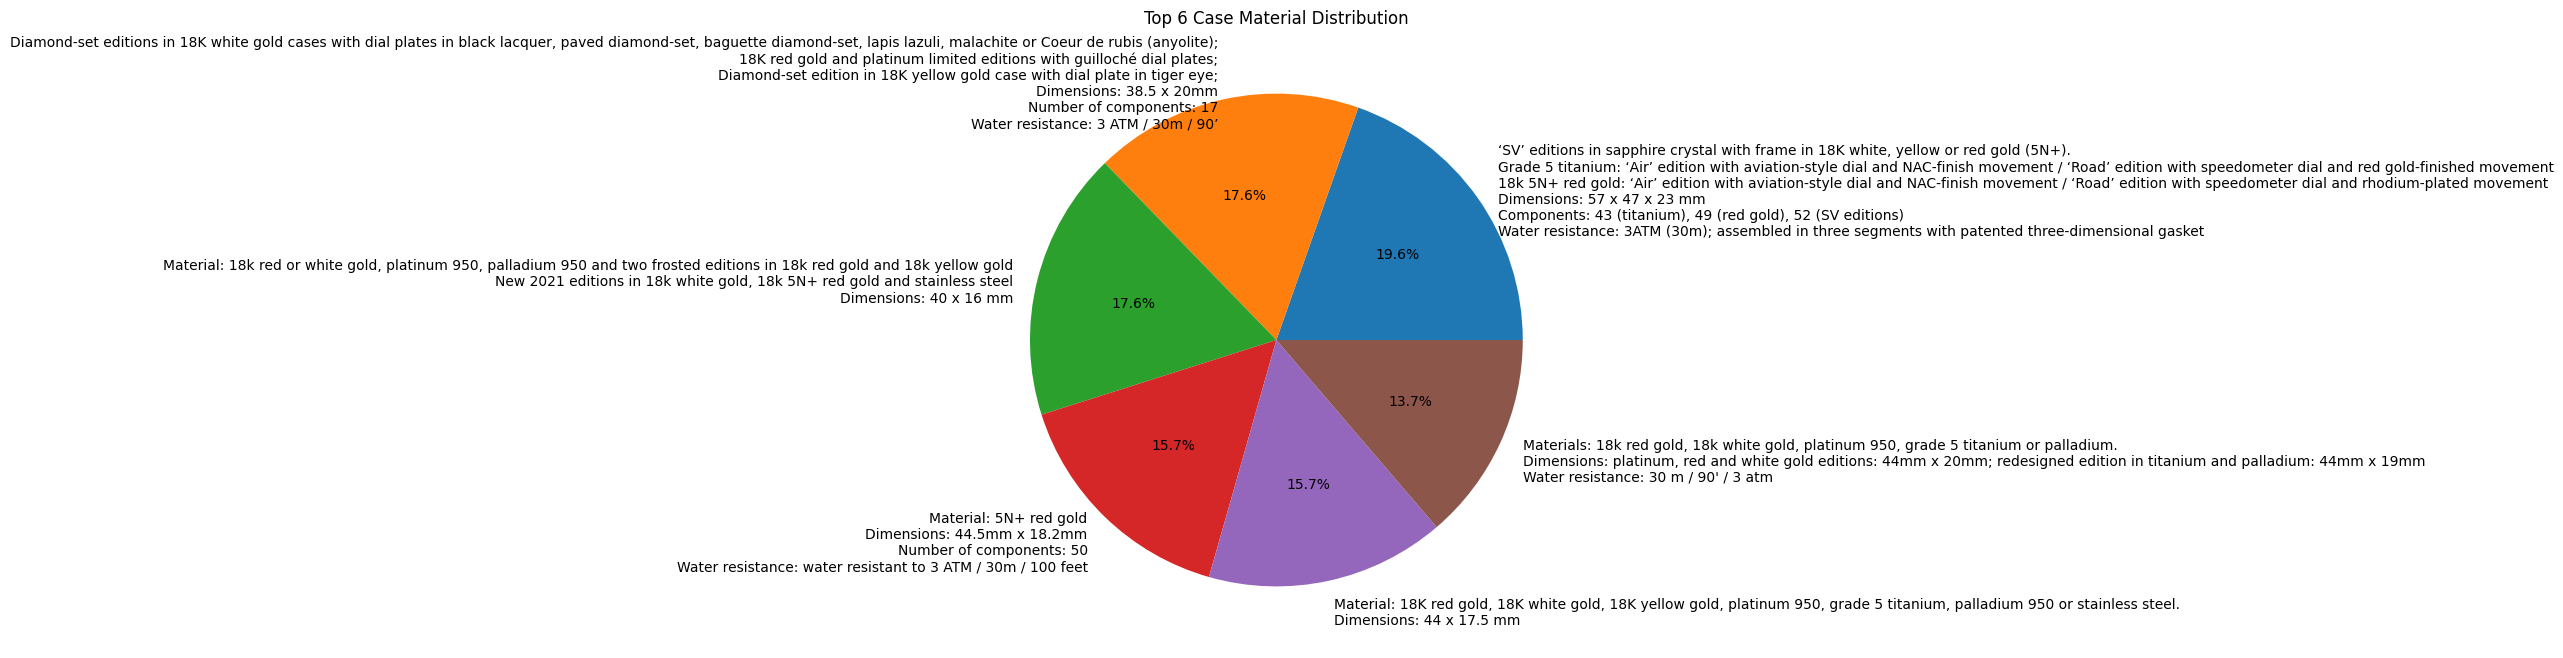

In [7]:
# Case Material Distribution - Top 6
case_material_counts = df['case_material'].value_counts().head(6)
plt.figure(figsize=(8, 8))
plt.pie(case_material_counts.values, labels=case_material_counts.index, autopct='%1.1f%%')
plt.title('Top 6 Case Material Distribution')
plt.show()

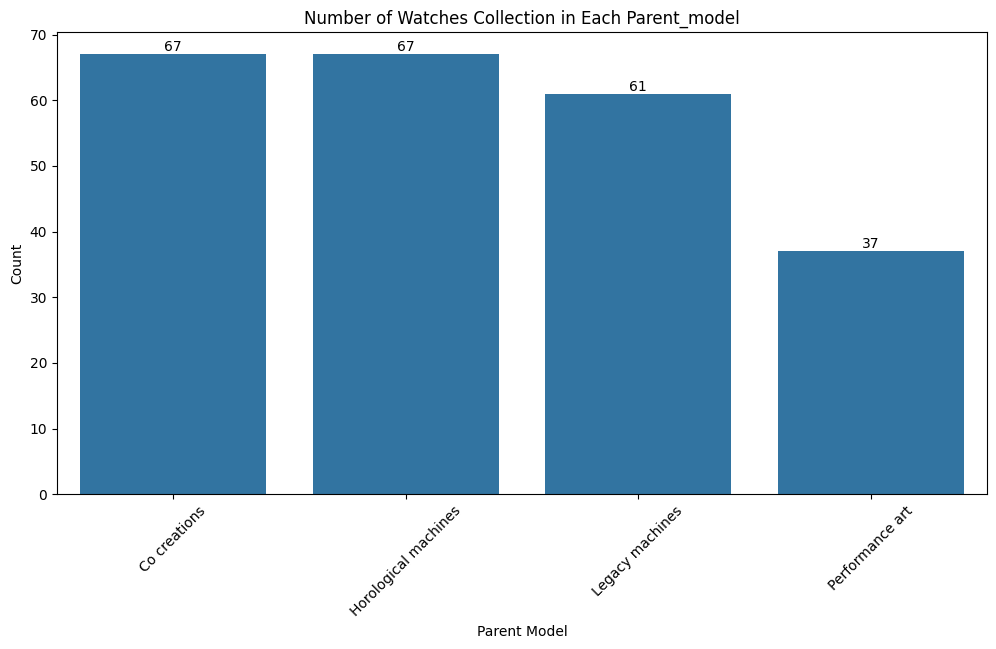

In [8]:
# Count the number of watches in each category of the parent_model column
parent_model_counts = df['parent_model'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=parent_model_counts.index, y=parent_model_counts.values)
plt.title('Number of Watches Collection in Each Parent_model')
plt.xlabel('Parent Model')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, count in enumerate(parent_model_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

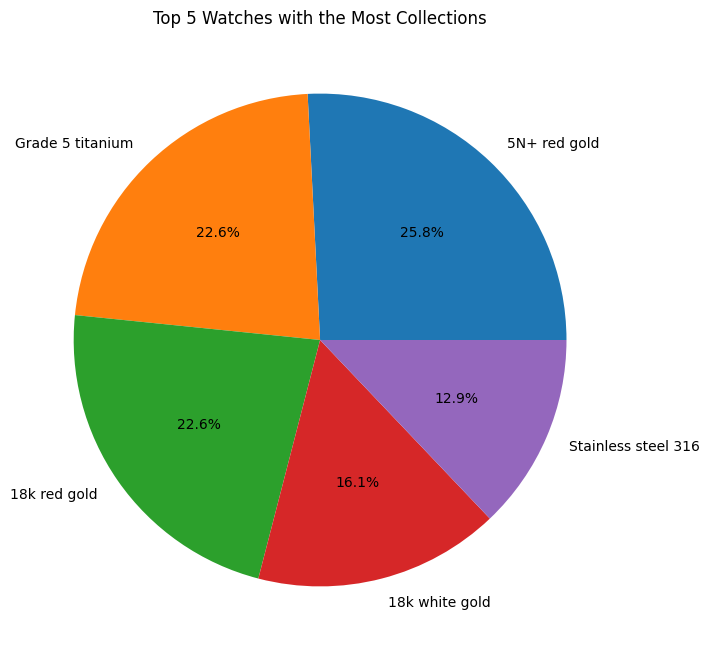

In [9]:
# Count the number of collections for each nickname
nickname_counts = df['nickname'].value_counts()

#  top 5 watches 
top_5_watches = nickname_counts.head(5)

plt.figure(figsize=(8, 8))
plt.pie(top_5_watches.values, labels=top_5_watches.index, autopct='%1.1f%%')
plt.title('Top 5 Watches with the Most Collections')
plt.show()

# Hint: URLs retrieve Function
- Here we build a function that can retrieve all urls from BM&F brand, but we doesn't use it, because will retrieve all watches even that have product card or not and that will occur error in main function sence there are some watches didn't have product card ,but we build it that we don't need to define all urls in the code   

In [10]:
def machine_links(soup):
    machine = soup.find('div',class_ = 'row list halfmargins masonry-list-items')
    machine_category =  machine.find_all('a')
    machine_list = []
    for link in machine_category:
                src = link.get("href")
                if src:
                       src = requests.compat.urljoin(url, src)
                       machine_list.append(src) 
    return machine_list